# Task:=>

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,
1. Measure accuracy of your model using different kernels such as rbf and linear.
2. Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
3. Use 80% of samples as training data size

# SK-Learn Digits Datasets With SVM

## Importing Important Libraries

In [1]:
# Mathematics Calculation
import numpy as np

# Data Preprocessing
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load sklearn digits dataset
from sklearn.datasets import load_digits

# import train test split
from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.svm import SVC

# Confusion Matrix and Classification Reports
from sklearn.metrics import confusion_matrix,classification_report


# Hyper Parameters Tunnings
from sklearn.model_selection import GridSearchCV

### Avoid warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load Datasets and collecting information from it

In [3]:
digits=load_digits() 

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
digits.target[21]

1

<Figure size 432x288 with 0 Axes>

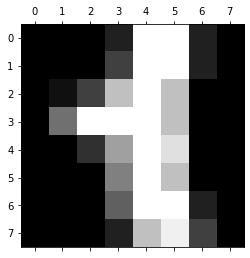

In [9]:
plt.gray()
plt.matshow(digits.images[21])
plt.show()

<Figure size 432x288 with 0 Axes>

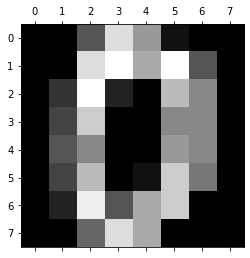

<Figure size 432x288 with 0 Axes>

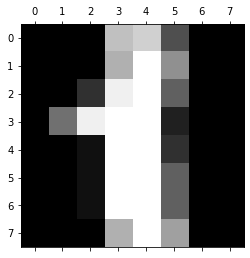

<Figure size 432x288 with 0 Axes>

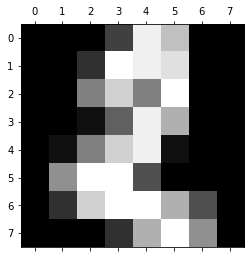

<Figure size 432x288 with 0 Axes>

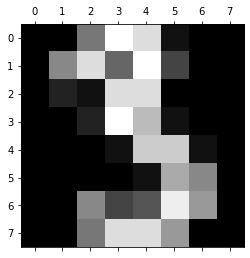

<Figure size 432x288 with 0 Axes>

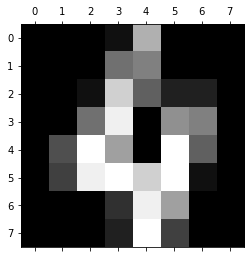

<Figure size 432x288 with 0 Axes>

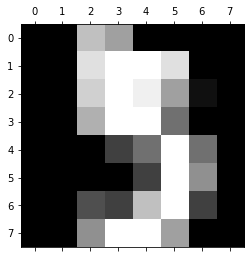

<Figure size 432x288 with 0 Axes>

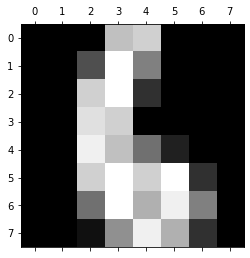

<Figure size 432x288 with 0 Axes>

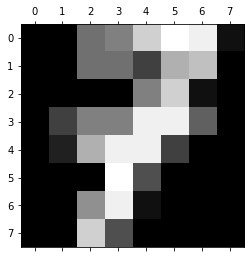

<Figure size 432x288 with 0 Axes>

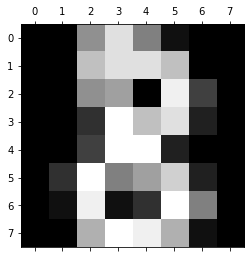

<Figure size 432x288 with 0 Axes>

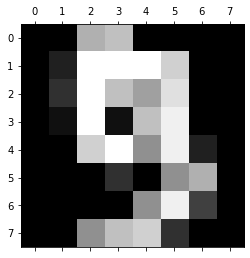

In [10]:
for i in range(10):
    plt.gray()
    plt.matshow(digits.images[i])
    plt.show()

### Convert datasets into Pandas DataFrame

In [11]:
df=pd.DataFrame(digits.data,columns=digits.feature_names)
df['target']=digits.target

## Data Preprocessing

In [12]:
df.head() 

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

## Data Visualization

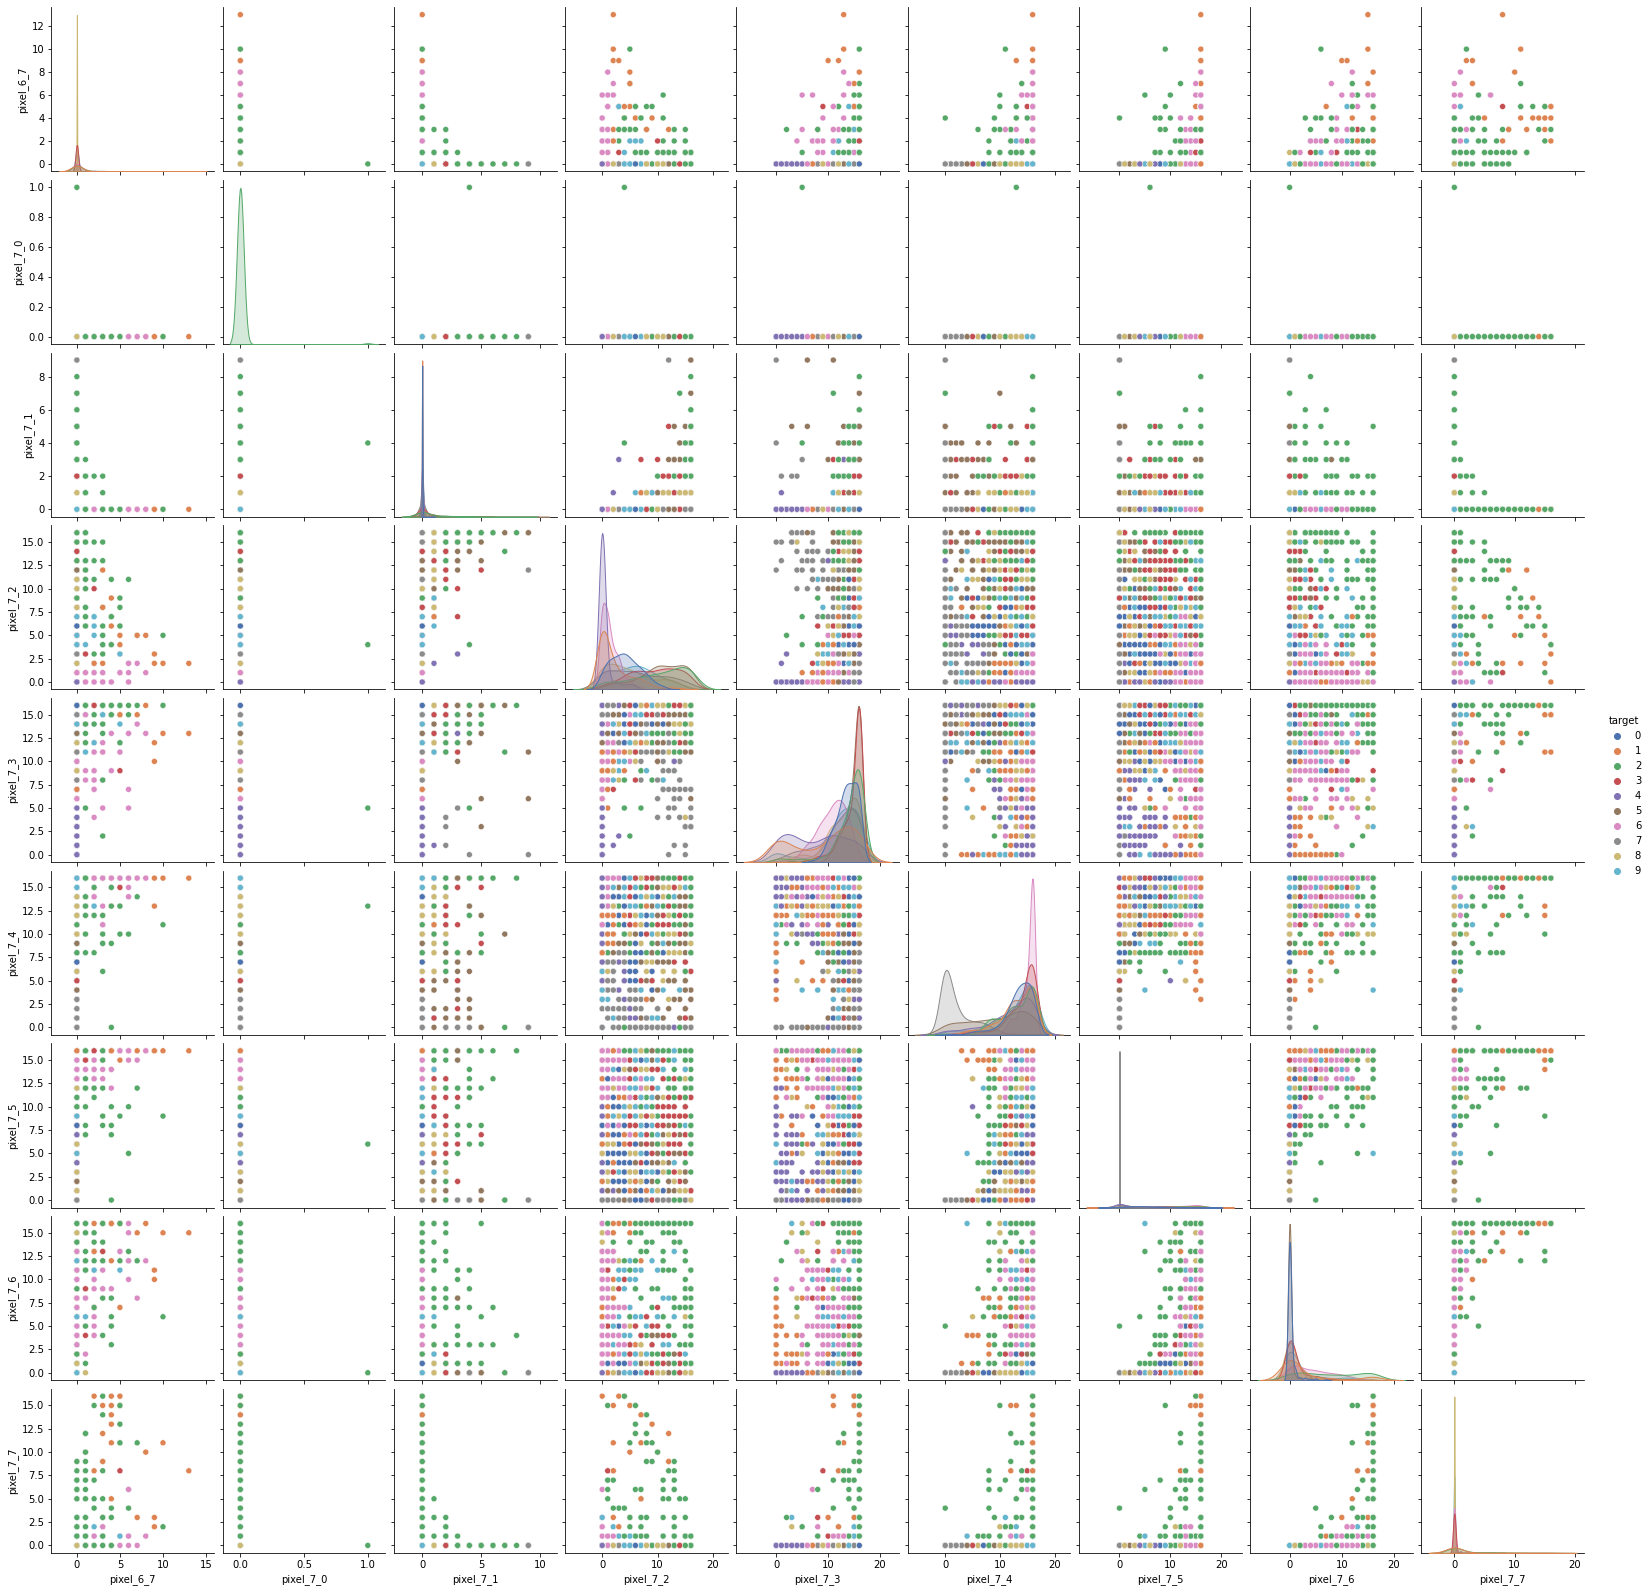

In [14]:
sns.pairplot(df.iloc[:,55:],hue='target',palette='deep')

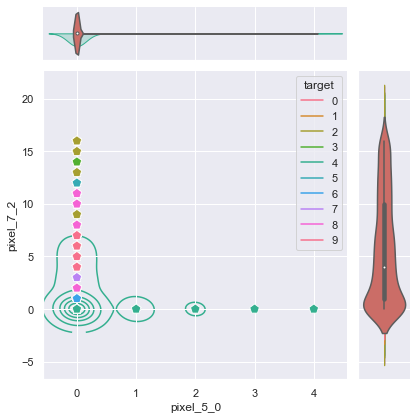

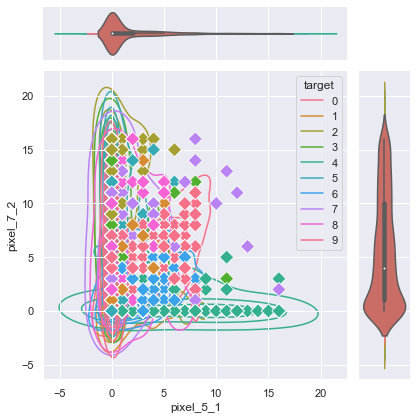

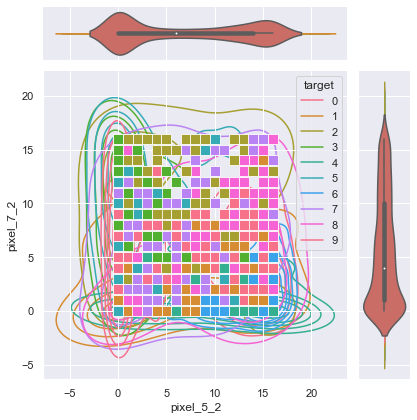

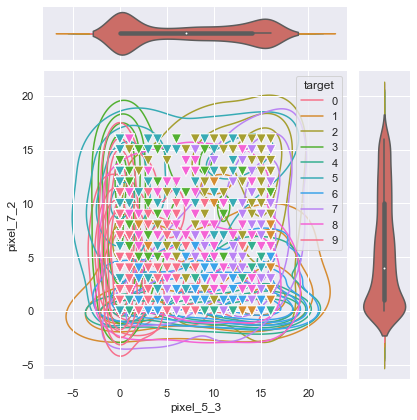

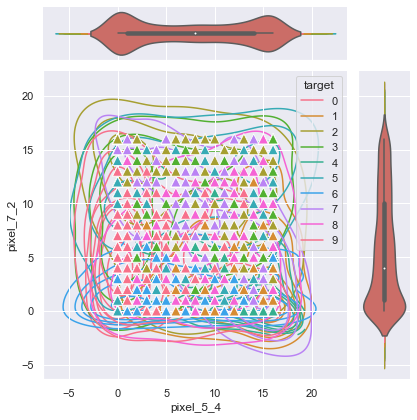

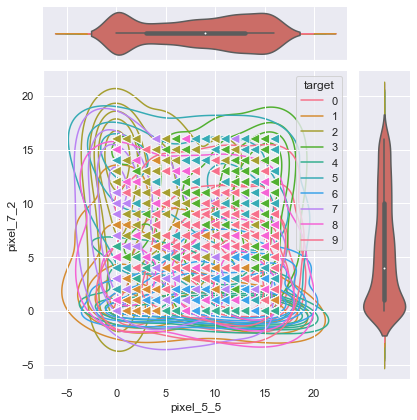

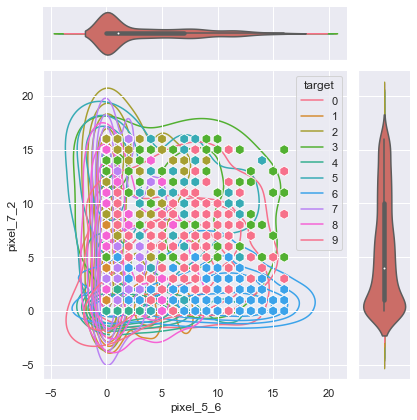

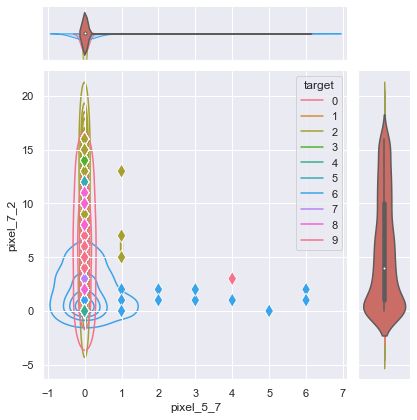

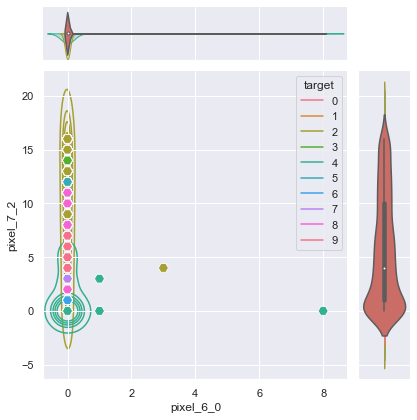

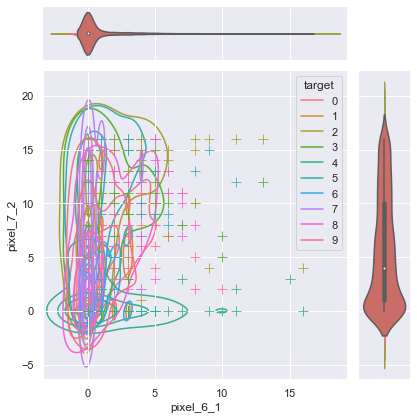

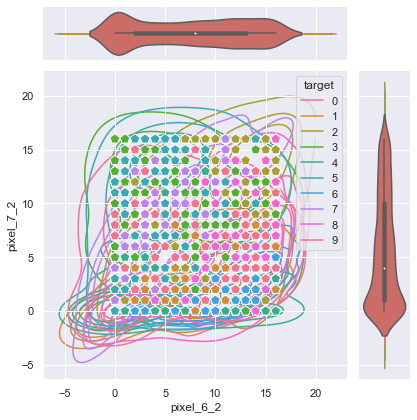

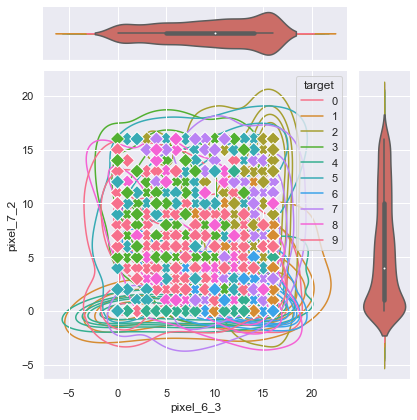

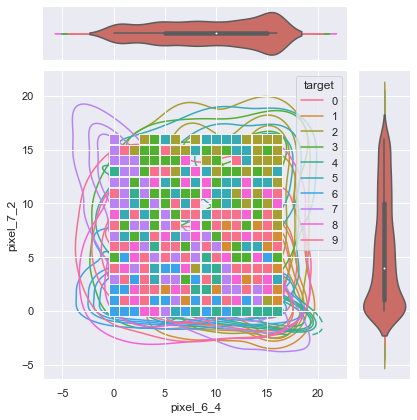

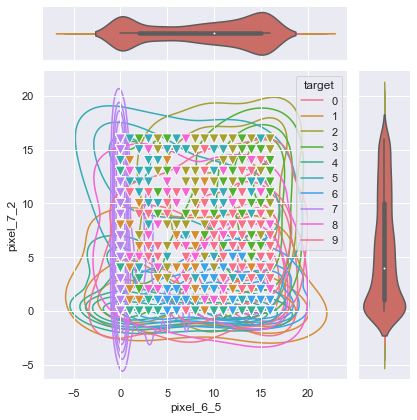

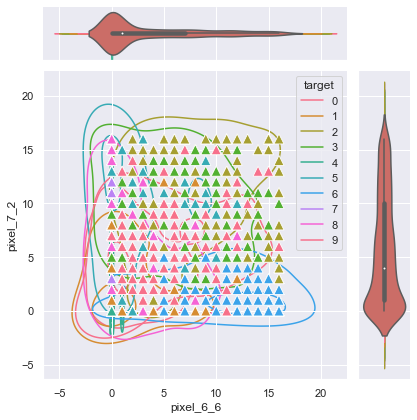

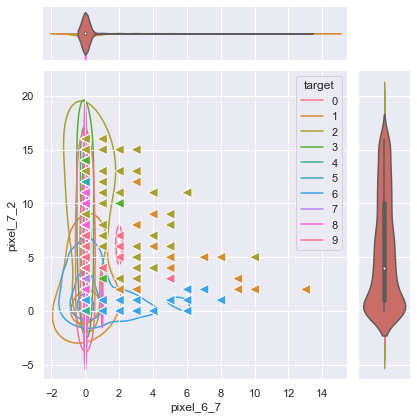

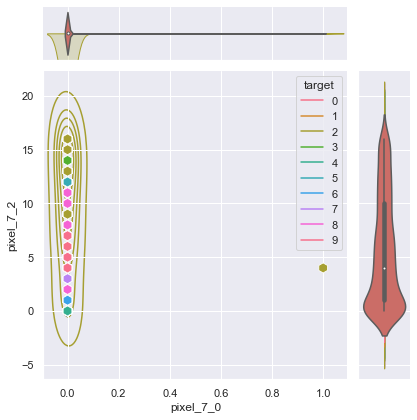

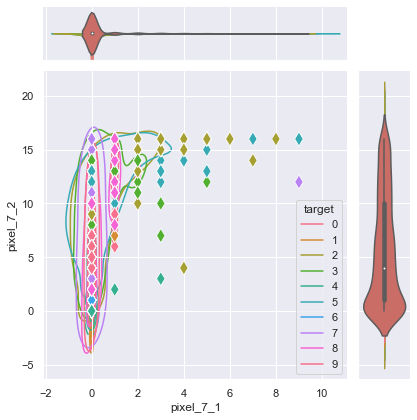

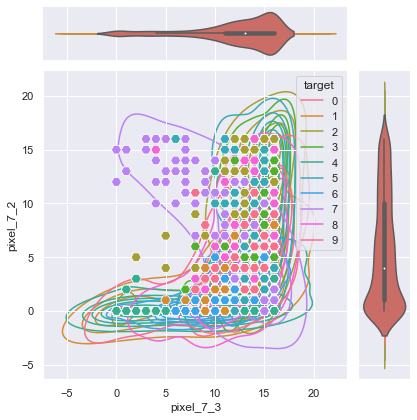

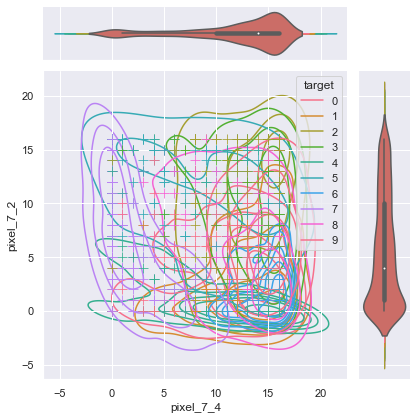

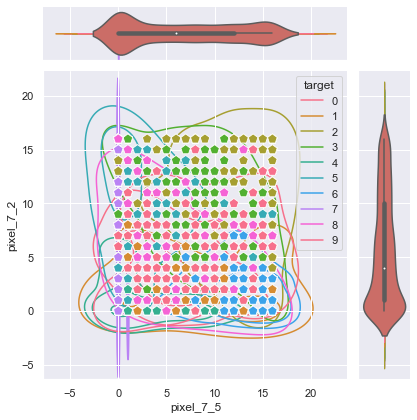

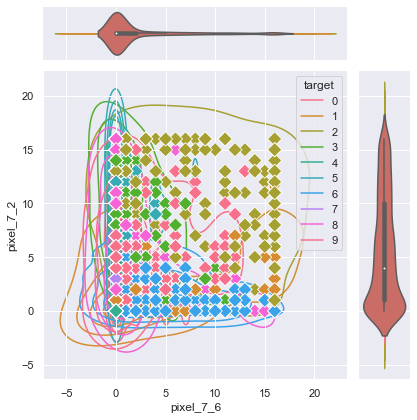

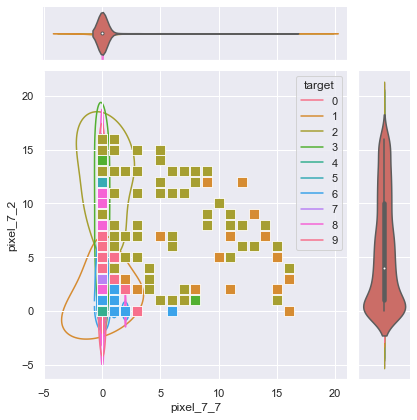

In [15]:
colors = ['red','blue','green','yellow','black','skyblue','pink','orange','lime','#eb9605']
markers = ['p','D',',','v','^','<','h','d','H','+']
for i,v in enumerate(df.drop(['pixel_7_2'],axis=1).columns[40:63]):
    sns.set (style="darkgrid")
    g=sns.jointplot(
        x=v,
        y='pixel_7_2',
        data=df,
        hue='target',
        color=colors[df.target[i]],
        marker=markers[df.target[i]],
        s=100, 
        palette='husl'
    )
    g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
    g.plot_marginals(sns.violinplot,palette='hls', clip_on=False)

In [16]:
counts=df.target.value_counts()
counts

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

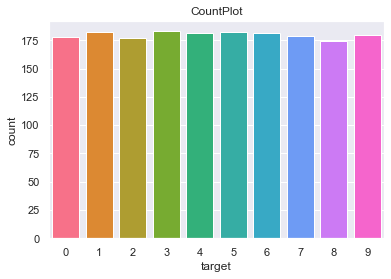

In [17]:
sns.set(style='darkgrid')
sns.countplot(x=df['target'],saturation=1,palette='husl')
plt.title('CountPlot')
plt.show()

## Dividing Data into x and y & Split into train and test data

In [18]:
x=df
y=digits.target

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)

In [20]:
xtrain.shape, xtest.shape , ytrain.shape, ytest.shape

((1437, 65), (360, 65), (1437,), (360,))

## Creating Model for SVC() and train the model

In [21]:
svm=SVC()

In [22]:
svm.fit(xtrain,ytrain)
svm.score(xtest,ytest)

0.9861111111111112

### Finding best values of random state for train_test_split

In [23]:
acc=[]
for i in range(1,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=i)
    svm=SVC()
    svm.fit(xtrain,ytrain)
    print(f"value={i} and accuracy={svm.score(xtest,ytest)}")
    acc.append(svm.score(xtest,ytest))
maxAcc=max(acc)
random_state=acc.index(maxAcc)+1
print("=============================================================")
print("=============================================================")
print(f"Best value={random_state} and Best accuracy={maxAcc}")
print("=============================================================")
print("=============================================================")

value=1 and accuracy=0.9916666666666667
value=2 and accuracy=0.9833333333333333
value=3 and accuracy=0.9916666666666667
value=4 and accuracy=0.9944444444444445
value=5 and accuracy=0.9805555555555555
value=6 and accuracy=0.9861111111111112
value=7 and accuracy=0.9944444444444445
value=8 and accuracy=0.9888888888888889
value=9 and accuracy=0.9916666666666667
value=10 and accuracy=0.9888888888888889
value=11 and accuracy=0.9861111111111112
value=12 and accuracy=0.9916666666666667
value=13 and accuracy=0.9888888888888889
value=14 and accuracy=0.9972222222222222
value=15 and accuracy=0.9888888888888889
value=16 and accuracy=0.9944444444444445
value=17 and accuracy=0.9861111111111112
value=18 and accuracy=0.9944444444444445
value=19 and accuracy=0.9805555555555555
value=20 and accuracy=0.9888888888888889
value=21 and accuracy=0.9944444444444445
value=22 and accuracy=0.9972222222222222
value=23 and accuracy=0.9972222222222222
value=24 and accuracy=0.9944444444444445
value=25 and accuracy=0.9

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.33,random_state=random_state)

In [25]:
svm=SVC()
svm.fit(xtrain,ytrain)
svm.score(xtest,ytest)

0.9966329966329966

In [26]:
pred=svm.predict(xtest)
pred[:20]

array([4, 5, 8, 8, 9, 0, 7, 5, 1, 8, 5, 7, 2, 7, 2, 8, 2, 0, 5, 1])

In [27]:
ytest[:20]

array([4, 5, 8, 8, 9, 0, 7, 5, 1, 8, 5, 7, 2, 7, 2, 8, 2, 0, 5, 1])

## Confusion Matrix and Classification Report

In [28]:
print ("Confusion matrix")
print(confusion_matrix(ytest,pred))

Confusion matrix
[[63  0  0  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  0  0  0  0  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0  0]
 [ 0  0  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0 59  1  0  0  0]
 [ 0  0  0  0  0  0 65  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  0  0  0  0  0  0  0 52  0]
 [ 0  0  0  0  0  0  0  0  1 61]]


In [29]:
print("EVALUATION ON TESTING DATA")
print(classification_report(ytest,pred))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        53
           5       1.00      0.98      0.99        60
           6       0.98      1.00      0.99        65
           7       1.00      1.00      1.00        54
           8       0.98      1.00      0.99        52
           9       1.00      0.98      0.99        62

    accuracy                           1.00       594
   macro avg       1.00      1.00      1.00       594
weighted avg       1.00      1.00      1.00       594



## Hyper Parameters Tuning

In [30]:
C= [0.1, 1, 10, 100, 1000]
gamma= [1, 0.1, 0.01, 0.001, 0.0001]
kernel= ['rbf']
# defining parameter range
param_grid = {
    'C':C,
    'gamma':gamma,
    'kernel':kernel
 }

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.108, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.108, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.104, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.104, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.108, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.108, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.108, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.104, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.104, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.801, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.763, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.784, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.746, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.696, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.992, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.988, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.988, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.988, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.992, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.983, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.992, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.992, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.983, total=   0.0s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   15.3s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [31]:
# best parameter
print(grid.best_params_)

# best estimator
print(grid.best_estimator_)

# best score
print(grid.best_score_)


pred = grid.predict(xtest)

# print classification report
print(confusion_matrix(ytest, pred))

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)
0.9891908713692945
[[63  0  0  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  0  0  0  0  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0  0]
 [ 0  0  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0 58  1  0  0  1]
 [ 0  0  0  0  0  0 65  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  0  0  0  0  0  0  0 52  0]
 [ 0  0  0  0  0  0  0  0  1 61]]


In [32]:
# print classification report
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        53
           5       1.00      0.97      0.98        60
           6       0.98      1.00      0.99        65
           7       1.00      1.00      1.00        54
           8       0.98      1.00      0.99        52
           9       0.98      0.98      0.98        62

    accuracy                           0.99       594
   macro avg       0.99      1.00      0.99       594
weighted avg       1.00      0.99      0.99       594

